In [1]:
import pandas as pd
from Bio import Entrez
Entrez.email = '1421128585@qq.com'
# Entrez.tool = 'Demoscript'

In [13]:
def search_pubmed(query, max_results=10000):
    # 使用Entrez.search()进行查询
    handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    record = Entrez.read(handle)
    # handle.close()
    
    # 获取PubMed文献的ID列表
    pubmed_ids = record["IdList"]
    
    return pubmed_ids

In [73]:
# 遍历文件夹中的指定格式的文件
def openFolderAll(folder_path,desired_extension):
    filelist = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path) and filename.endswith(desired_extension):
            filelist.append(file_path)
    return filelist

In [75]:
# 示例：搜索包含关键词"gene therapy"的文献，最多返回10条结果
query = "asthma and lung"
pubmed_ids0 = search_pubmed(query, max_results=10000)
print(len(pubmed_ids0))


9999


In [84]:
# 示例：搜索包含关键词"gene therapy"的文献，最多返回10条结果
query = "asthma and lung"
pubmed_ids = search_pubmed(query, max_results=10000)
# 指定文件夹路径
folder_path = r'E:\00_CeSOP\results\lcczscore-pip-coreperi-alltraits\core\29\Lung'
# 获取文件夹中所有指定格式的文件名
celltypes = [f.split(".")[0] for f in os.listdir(folder_path) if f.endswith('.csv')]
result_list = []
for celltype in celltypes:
    query0 = "lung and "+celltype
    pubmed_ids0 = search_pubmed(query0, max_results=10000)
    lung_asthma_celltype = set(pubmed_ids)&set(pubmed_ids0)
    # pubmed_ids1 = search_pubmed(query0 + "asthma", max_results=10000)
    
    all = set(pubmed_ids)|set(pubmed_ids0)-set(lung_asthma_celltype)
    table = [[len(lung_asthma_celltype),len(pubmed_ids0)-len(lung_asthma_celltype)],[len(pubmed_ids) - len(lung_asthma_celltype),len(all)]]
    print(celltype,len(lung_asthma_celltype), len(pubmed_ids0),len(all))
    result_list.append([celltype,len(lung_asthma_celltype), len(pubmed_ids0)])

adventitial cell 8 648
alveolar fibroblast 23 3214
b cell 0 0
basal cell 56 6915
basophil 82 1381
bronchial smooth muscle cell 107 1465
bronchial vessel endothelial cell 2 275
capillary aerocyte 1 5
capillary endothelial cell 92 9999
cd4-positive alpha-beta t cell 0 81
cd4-positive, alpha-beta t cell 0 81
cd8-positive alpha-beta t cell 0 93
cd8-positive, alpha-beta t cell 0 93
classical monocyte 5 344
club cell 43 651
dendritic cell 165 7624
endothelial cell of artery 5 4202
endothelial cell of lymphatic vessel 1 376
fibroblast 187 9999
intermediate monocyte 5 165
lung ciliated cell 32 1880
lung microvascular endothelial cell 12 3013
macrophage 506 9999
mesothelial cell 1 1195
myofibroblast cell 32 2885
neutrophil 654 9999
nk cell 37 6270
non-classical monocyte 2 60
pericyte cell 9 542
plasma cell 122 9999
plasmacytoid dendritic cell 156 6502
pulmonary ionocyte 4 42
respiratory goblet cell 119 1146
respiratory mucous cell 115 1417
serous cell of epithelium of bronchus 0 78
smooth muscl

In [85]:
result_df = pd.DataFrame( result_list)
result_df.columns = ["celltype","#asthma_lung_celltype","#lung_celltype"]

In [86]:
for celltype in result_df["celltype"]:
    table = [[1, 9], [11, 5]]
    scipy.stats.fisher_exact(table, alternative='two-sided')


,celltype,#asthma_lung_celltype,#lung_celltype
0,adventitial cell,8,648
1,alveolar fibroblast,23,3214
2,b cell,0,0
3,basal cell,56,6915
4,basophil,82,1381
5,bronchial smooth muscle cell,107,1465
6,bronchial vessel endothelial cell,2,275
7,capillary aerocyte,1,5
8,capillary endothelial cell,92,9999
9,cd4-positive alpha-beta t cell,0,81


In [78]:
import pandas as pd
import os
import time
import warnings
# 禁用所有警告
warnings.filterwarnings("ignore")

In [24]:
# 遍历49个性状和24个组织 ， 统计相关的文献数量
traits = list(pd.read_excel(r"E:\00_CeSOP\data\49_traits.xlsx")["Trait name"])
tissues = list(os.listdir(r"..\results\asthma\lcczscore-pip"))

traits_liter_num = []
for trait in traits:
    pubmed_ids0 = search_pubmed(trait, max_results=10000)
    traits_liter_num.append(len(pubmed_ids0))
    print(trait, len(pubmed_ids0), str(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    
tissues_liter_num = []
for tissue in tissues:
    pubmed_ids1 = search_pubmed(tissue, max_results=10000)
    tissues_liter_num.append(len(pubmed_ids1))  
    print(tissue, len(pubmed_ids1),str(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))

Cholesterol 9999 2024-12-08 17:42:03
Glucose 9999 2024-12-08 17:42:09
HbA1c 9999 2024-12-08 17:42:14
HDL Cholesterol 9999 2024-12-08 17:42:18
LDL Cholesterol 9999 2024-12-08 17:42:22
Triglycerides 9999 2024-12-08 17:42:27
Vitamin D 9999 2024-12-08 17:42:29
Eosinophil Count 9999 2024-12-08 17:42:34
High Light Scatter Retic. Count 8 2024-12-08 17:42:35
Lymphocyte Count 9999 2024-12-08 17:42:39
Mean Corpuscular Hemoglobin 9999 2024-12-08 17:42:43
Mean Platelet Volume 7281 2024-12-08 17:42:47
Monocyte Count 9999 2024-12-08 17:42:51
Platelet Count 9999 2024-12-08 17:42:55
Red Blood Cell Dist. Width 1 2024-12-08 17:42:57
Red Blood Cell Count 9999 2024-12-08 17:43:01
White Blood Count 9999 2024-12-08 17:43:05
Bone Mineral Density 9999 2024-12-08 17:43:09
Balding Type 1 1296 2024-12-08 17:43:10
BMI 9999 2024-12-08 17:43:14
Height 9999 2024-12-08 17:43:19
Waist-Hip Ratio 9999 2024-12-08 17:43:23
Diastolic blood pressure 9999 2024-12-08 17:43:27
Systolic Blood Pressure 9999 2024-12-08 17:43:30
E

In [25]:
# 使用字典方式将列表作为列合并
df1 = pd.DataFrame({'Traits': traits, '#Literature': traits_liter_num})
df2 = pd.DataFrame({'Tissues': tissues, '#Literature': tissues_liter_num})

df1.to_csv(r"E:\00_CeSOP\results\literatures\traits_liter_num.csv")
df2.to_csv(r"E:\00_CeSOP\results\literatures\tissues_liter_num.csv")

                             Traits  #Literature
0                       Cholesterol         9999
1                           Glucose         9999
2                             HbA1c         9999
3                   HDL Cholesterol         9999
4                   LDL Cholesterol         9999
5                     Triglycerides         9999
6                         Vitamin D         9999
7                  Eosinophil Count         9999
8   High Light Scatter Retic. Count            8
9                  Lymphocyte Count         9999
10      Mean Corpuscular Hemoglobin         9999
11             Mean Platelet Volume         7281
12                   Monocyte Count         9999
13                   Platelet Count         9999
14       Red Blood Cell Dist. Width            1
15             Red Blood Cell Count         9999
16                White Blood Count         9999
17             Bone Mineral Density         9999
18                   Balding Type 1         1296
19                  

In [32]:
df = pd.read_csv(r"E:\00_CeSOP\results\literatures\traits_liter_num.csv")
# 筛选出col1列值大于10的所有行
filtered_df = df[df['#Literature'] > 5]
# 获取对应行的col2列值，并转换为列表
traits = filtered_df['Traits'].tolist()

In [48]:

traits_tissues_liter_num = []
count = 0
for trait in traits:
   tissues_liter_num = []
   for tissue in tissues:
       pubmed_ids2 = search_pubmed(trait + " AND " + tissue, max_results=10000)
       tissues_liter_num.append(len(pubmed_ids2))
       print(trait + " AND " + tissue,str(len(pubmed_ids2)))
   count+=1
   print(str(count), trait, str(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())),"\n")
   traits_tissues_liter_num.append(tissues_liter_num)   

Cholesterol AND Bladder 755
Cholesterol AND Blood 9999
Cholesterol AND Bone_Marrow 1812
Cholesterol AND Eye 3434
Cholesterol AND Fat 9999
Cholesterol AND Heart 9999
Cholesterol AND Kidney 9999
Cholesterol AND Large_Intestine 1115
Cholesterol AND Liver 9999
Cholesterol AND Lung 6614
Cholesterol AND Lymph_Node 639
Cholesterol AND Mammary 4770
Cholesterol AND Muscle 9999
Cholesterol AND Pancreas 2617
Cholesterol AND Prostate 2032
Cholesterol AND Salivary_Gland 140
Cholesterol AND Skin 5787
Cholesterol AND Small_Intestine 3325
Cholesterol AND Spleen 2303
Cholesterol AND Thymus 544
Cholesterol AND Tongue 100
Cholesterol AND Trachea 91
Cholesterol AND Uterus 962
Cholesterol AND Vasculature 3343
1 Cholesterol 2024-12-08 18:06:14 

Glucose AND Bladder 1465
Glucose AND Blood 9999
Glucose AND Bone_Marrow 3397
Glucose AND Eye 8977
Glucose AND Fat 9999
Glucose AND Heart 9999
Glucose AND Kidney 9999
Glucose AND Large_Intestine 2345
Glucose AND Liver 9999
Glucose AND Lung 9999
Glucose AND Lymph_Node

In [49]:
traits_tissues_liter_num_df = pd.DataFrame(traits_tissues_liter_num)
traits_tissues_liter_num_df.columns = tissues
traits_tissues_liter_num_df.index = traits

In [57]:
df = pd.read_csv(r"E:\00_CeSOP\results\literatures\traits_liter_num.csv",index_col=0)
# 筛选出col1列值大于10的所有行
filtered_df = df[df['#Literature'] > 5]
filtered_df.index = filtered_df['Traits']

In [59]:

# 将df1的所有数据除以df2中的列'C'，这里假设df2只有一列'C'
traits_tissues_liter_num_df_divided = traits_tissues_liter_num_df.div(filtered_df['#Literature'], axis=0)

In [60]:
traits_tissues_liter_num_df_divided

,Bladder,Blood,Bone_Marrow,Eye,Fat,Heart,Kidney,Large_Intestine,Liver,Lung,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Thymus,Tongue,Trachea,Uterus,Vasculature
Cholesterol,0.075508,1.000000,0.181218,0.343434,1.000000,1.000000,1.000000,0.111511,1.000000,0.661466,...,0.203220,0.014001,0.578758,0.332533,0.230323,0.054405,0.010001,0.009101,0.096210,0.334333
Glucose,0.146515,1.000000,0.339734,0.897790,1.000000,1.000000,1.000000,0.234523,1.000000,1.000000,...,0.228923,0.076408,0.888089,0.952095,0.331333,0.103110,0.060406,0.027503,0.180218,1.000000
HbA1c,0.012701,1.000000,0.013201,0.226723,0.379638,0.663466,0.567857,0.002000,0.354735,0.073207,...,0.019902,0.002400,0.091209,0.020702,0.008501,0.001700,0.002500,0.000100,0.002000,0.075508
HDL Cholesterol,0.006301,1.000000,0.024702,0.051805,1.000000,1.000000,0.384538,0.010601,1.000000,0.124412,...,0.032103,0.000900,0.076108,0.035804,0.030203,0.004700,0.001000,0.000100,0.017402,0.059906
LDL Cholesterol,0.005701,1.000000,0.048305,0.050805,1.000000,1.000000,0.399840,0.013101,1.000000,0.125313,...,0.028203,0.001000,0.091809,0.044404,0.033403,0.005501,0.001000,0.000100,0.016402,0.074407
Triglycerides,0.017502,1.000000,0.081008,0.120012,1.000000,1.000000,0.926993,0.061606,1.000000,0.256626,...,0.061206,0.008201,0.248725,0.213921,0.094409,0.021302,0.009301,0.002100,0.041704,0.164616
Vitamin D,0.024502,1.000000,0.128613,0.068107,0.434543,0.352335,1.000000,0.039204,0.492449,0.229123,...,0.173917,0.005001,0.598660,0.164916,0.035304,0.019102,0.004300,0.002100,0.031403,0.063906
Eosinophil Count,0.006901,1.000000,0.096810,0.027803,0.008901,0.091309,0.041704,0.015702,0.079508,0.426843,...,0.004400,0.003100,0.204120,0.028303,0.042204,0.018802,0.001800,0.012901,0.007801,0.013201
High Light Scatter Retic. Count,0.000000,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lymphocyte Count,0.024602,1.000000,0.317132,0.074407,0.058506,0.206921,0.253025,0.039904,0.367337,0.422342,...,0.027903,0.013601,0.312431,0.055606,0.353235,0.222922,0.008001,0.006601,0.036204,0.033003


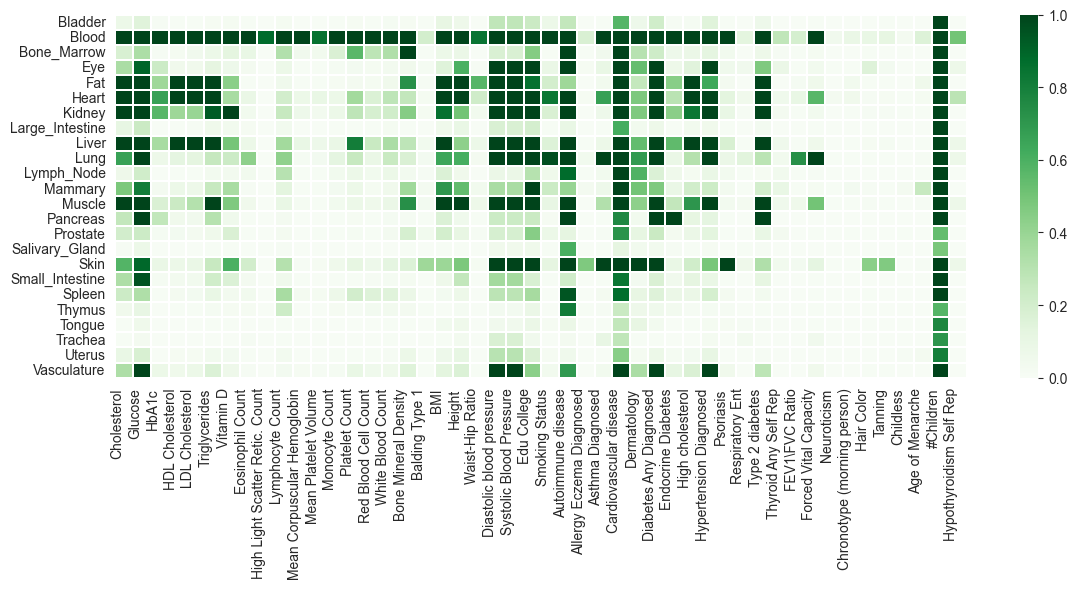

In [71]:
# # 使用 seaborn 绘制热图
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
# 创建灰色到绿色的自定义颜色映射
# colors = [(0, "gray"), (1, "green")]  # (位置, 颜色)，从灰色到绿色
# cmap = LinearSegmentedColormap.from_list("gray_green", colors)
plt.figure(figsize=(12, 6))  # 设置图形大小
g = sns.heatmap(traits_tissues_liter_num_df_divided.T, cmap="Greens",linewidths = 0.01)
# 旋转x和y轴的标签，避免重叠
plt.xticks(rotation=90, ha='right')  # 设置x轴标签旋转角度和对齐方式
plt.yticks(rotation=0)  # 设置y轴标签旋转角度
# 自动调整布局，确保所有标签可见
plt.tight_layout()